<a href="https://colab.research.google.com/github/vidhyagowda-232/Bearing-Fault-detection-using-NARNET/blob/main/CodeClause_Credit_Card_Fraud_Detection_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [110]:
data = pd.read_csv("/content/creditcard.csv")

In [111]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [112]:
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0
25837,33787,1.303469,0.498450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

In [114]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25838.000000,25838.000000,25838.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,...,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000
mean,19376.128532,-0.225653,0.166976,0.723131,0.229368,-0.194354,0.079800,-0.128669,0.026060,0.441922,...,-0.037598,-0.132262,-0.039778,0.011174,0.129413,0.023418,0.013306,0.004153,75.808937,0.003406
std,11653.899424,1.889055,1.552796,1.684909,1.434242,1.436206,1.323018,1.319114,1.341622,1.269785,...,0.817316,0.641426,0.538789,0.590048,0.436213,0.516670,0.397674,0.280120,219.661154,0.058262
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7694.750000,-0.951266,-0.405158,0.279675,-0.683788,-0.779682,-0.662365,-0.594982,-0.164442,-0.384700,...,-0.249309,-0.552080,-0.173949,-0.325263,-0.133337,-0.338941,-0.065269,-0.008898,6.060000,0.000000
50%,22684.000000,-0.267973,0.176509,0.862364,0.204882,-0.224921,-0.179636,-0.067756,0.029393,0.358908,...,-0.097962,-0.106938,-0.049040,0.063000,0.167170,-0.052787,0.007047,0.019985,18.960000,0.000000
75%,30231.500000,1.166499,0.818206,1.489349,1.109950,0.320600,0.466671,0.446339,0.287518,1.200785,...,0.072314,0.276513,0.075082,0.399042,0.410283,0.306226,0.091845,0.076753,67.610000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [115]:
data.size

800978

In [116]:
data.shape

(25838, 31)

In [117]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [118]:
#Removing Null Values
data.dropna(inplace=True)

In [119]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [120]:
#Removing duplicate entries
data.duplicated().sum()

100

In [121]:
data.drop_duplicates(inplace=True)

In [122]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (88, 31)
Shape of Non-Fraudulant transactions: (25649, 31)


In [123]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()],axis=1)

,Amount,Amount
count,88.000000,25649.000000
mean,100.010000,75.915868
std,265.845031,219.872264
min,0.000000,0.000000
25%,1.000000,6.250000
50%,1.000000,18.990000
75%,99.990000,67.720000
max,1809.680000,7879.420000


In [124]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,88.000000,25649.000000
mean,17935.875000,19383.466022
std,8766.984265,11653.940694
min,406.000000,0.000000
25%,8860.500000,7705.000000
50%,17963.000000,22713.000000
75%,26872.000000,30234.000000
max,32745.000000,33787.000000


<ipython-input-125-604d829166f9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'], color='blue')
<ipython-input-125-604d829166f9>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'],color='blue')


<Axes: title={'center': 'Distribution of Amount'}, xlabel='Amount', ylabel='Density'>

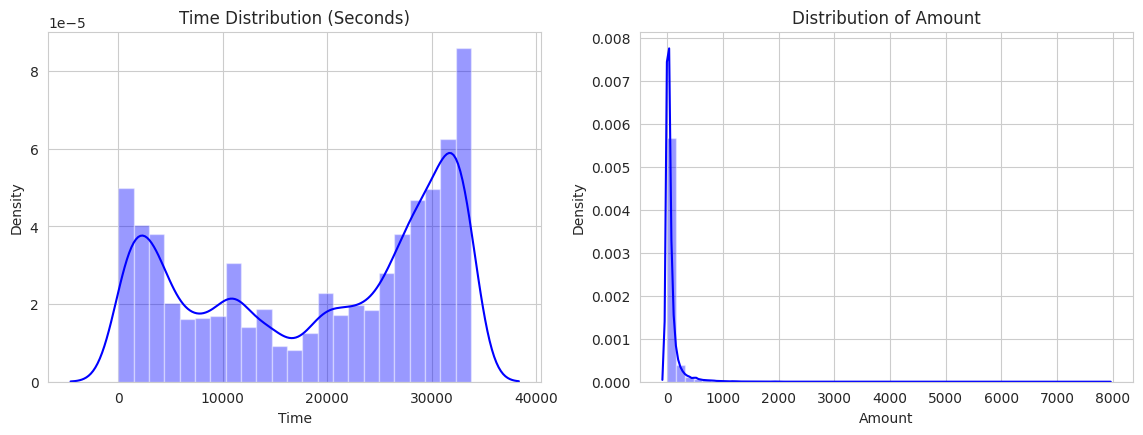

In [125]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue')

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue')

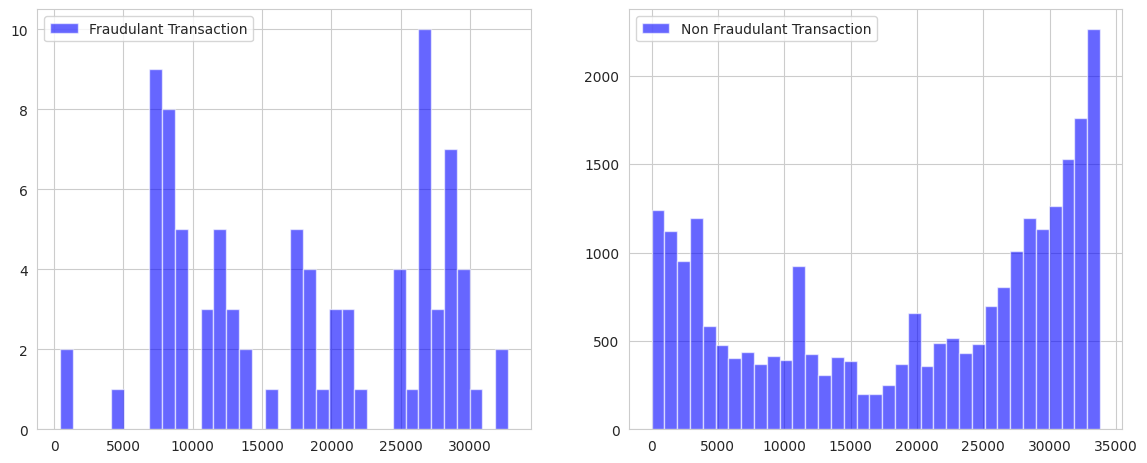

In [126]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

In [127]:
#Checking Correlation
data.corr().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.012721,-0.078189,-0.080585,-0.022126,-0.080515,-0.039791,-0.026038,0.045926,-0.273332,0.087543,-0.143554,0.286093,-0.277407,-0.207464,0.144499,0.037651,-0.076972,-0.051006,0.024472,0.014837,0.022580,0.037169,-0.008064,-0.014017,0.059273,-0.043682,-0.000459,0.002575,0.053702,-0.007256
V1,0.012721,1.000000,-0.206306,0.365574,-0.121676,0.148794,0.119194,0.231545,-0.152006,-0.017053,0.044022,-0.054833,0.072609,0.015579,0.179783,0.048516,0.147676,0.129655,0.005435,0.017354,-0.128760,-0.097411,0.031256,-0.040675,0.001012,0.159919,0.024836,-0.147989,0.131299,-0.212925,-0.260275
V2,-0.078189,-0.206306,1.000000,-0.320673,0.134027,-0.185409,-0.036038,-0.108837,0.086427,-0.052969,-0.025868,0.115116,-0.129600,0.048069,-0.124134,0.052737,-0.079379,-0.100732,-0.009793,-0.020242,-0.054338,0.032141,-0.119400,-0.004384,-0.028787,-0.086272,-0.059392,0.088465,0.021732,-0.482458,0.234304
V3,-0.080585,0.365574,-0.320673,1.000000,-0.181649,0.361211,0.035728,0.414529,-0.346049,0.183558,0.237691,-0.156154,0.145831,0.004048,0.282835,-0.165168,0.061988,0.206802,0.057459,-0.035499,-0.114145,-0.019075,0.244948,0.057316,0.038324,-0.188603,0.065971,-0.189562,0.041822,-0.151868,-0.449399
V4,-0.022126,-0.121676,0.134027,-0.181649,1.000000,-0.104607,-0.048204,-0.142686,0.113047,-0.073770,-0.098139,0.071752,-0.133097,0.058725,-0.100328,-0.125975,-0.172074,-0.007200,-0.033735,-0.030920,0.024573,0.007827,-0.018888,-0.011282,-0.025126,-0.023343,0.042539,0.059555,-0.019345,0.112333,0.245040
V5,-0.080515,0.148794,-0.185409,0.361211,-0.104607,1.000000,0.111614,0.128829,-0.169941,0.043298,0.181873,-0.075319,0.057878,0.041726,0.107947,0.070485,0.141170,0.086788,0.105801,-0.003578,-0.004712,-0.054781,-0.063470,0.035032,-0.004195,-0.072852,-0.046840,-0.136576,-0.000553,-0.360504,-0.237592
V6,-0.039791,0.119194,-0.036038,0.035728,-0.048204,0.111614,1.000000,0.113841,-0.094690,0.053486,0.065553,-0.101966,0.000913,0.025897,0.100067,-0.114626,0.030403,0.042995,0.056538,0.093517,-0.018229,0.043698,0.014066,-0.007519,0.021387,0.061195,0.011631,-0.025474,-0.030842,0.215781,-0.113473
V7,-0.026038,0.231545,-0.108837,0.414529,-0.142686,0.128829,0.113841,1.000000,-0.158996,0.061567,0.232741,-0.152054,0.205109,-0.023424,0.123870,0.077674,0.159320,0.185793,0.119540,-0.049517,-0.031543,-0.104159,0.028657,0.056163,0.006839,-0.125854,-0.039053,-0.152225,-0.105196,0.311884,-0.362972
V8,0.045926,-0.152006,0.086427,-0.346049,0.113047,-0.169941,-0.094690,-0.158996,1.000000,-0.079438,-0.162444,0.032179,-0.089240,-0.009592,-0.082145,-0.010865,-0.060741,-0.097953,-0.041103,0.022296,0.048574,-0.141687,0.046413,-0.088219,0.009514,0.045299,-0.010747,0.088465,0.039135,-0.059761,0.189654
V9,-0.273332,-0.017053,-0.052969,0.183558,-0.073770,0.043298,0.053486,0.061567,-0.079438,1.000000,-0.015631,0.102196,-0.271934,0.276117,0.295061,-0.221168,-0.062058,0.250429,0.132868,-0.060369,0.010060,-0.031547,0.011082,-0.026960,0.001783,0.103245,0.066198,-0.057593,-0.078061,-0.010502,-0.158022


In [128]:
data["Amount"].describe()

count    25737.000000
mean        75.998250
std        220.044081
min          0.000000
25%          6.130000
50%         18.980000
75%         67.960000
max       7879.420000
Name: Amount, dtype: float64

In [129]:
#number of occurrences of each class label 
non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  25649
Number of Fraud transactions:  88
Percentage of Fraud transactions: 0.3419


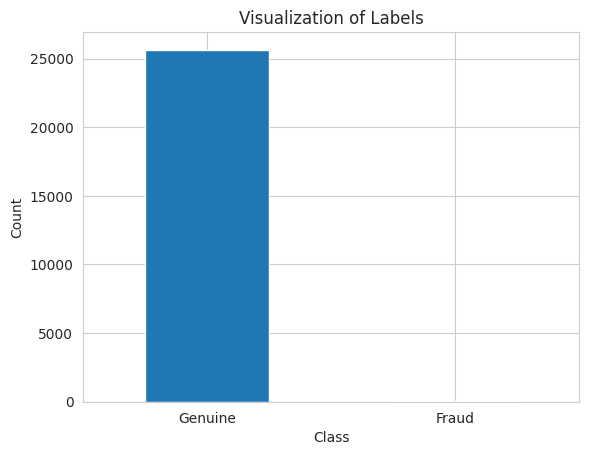

In [130]:
#Plotting Target Distribution
labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [131]:
#No. of genuine and fraud transations
data.Class.value_counts()

0.0    25649
1.0       88
Name: Class, dtype: int64

In [132]:
# Creating a new dataframe with balanced target data so our model can make accurate predictions
x=data.sample(473,random_state=1)[data['Class']==0]
y=data[data['Class']==1]
new_data=pd.concat([x,y],axis=0)

<ipython-input-132-7019e2f23251>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=data.sample(473,random_state=1)[data['Class']==0]


In [133]:
# Split the dataset into train, validation, and test data
x = new_data.drop('Class', axis=1)
y = new_data.Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [134]:
print("size of the train data", x_train.shape, y_train.shape)
print("size of the test data", x_test.shape, y_test.shape)

size of the train data (448, 30) (448,)
size of the test data (112, 30) (112,)


In [135]:
#Applying Scaling to transform the range of values
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [136]:
#Creating a function to test multiple model effectively
def mymodel(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    
    tr=model.score(x_train,y_train)
    te=model.score(x_test,y_test)
    
    print(str(model)[:-2],'Accuracy: ',accuracy_score(y_test,ypred),'\nConfusion Matrix: \n',confusion_matrix(y_test,ypred))
    print("Classification report: \n",classification_report(y_test,ypred))
    print(f'Training Accuracy: {tr} \nTesting Accuracy: {te}')
    
    return model

In [137]:
#KNN
knn = mymodel(KNeighborsClassifier())

KNeighborsClassifier Accuracy:  1.0 
Confusion Matrix: 
 [[93  0]
 [ 0 19]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        93
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Training Accuracy: 0.9776785714285714 
Testing Accuracy: 1.0


In [138]:
#SVC
svc = mymodel(SVC())

SVC Accuracy:  1.0 
Confusion Matrix: 
 [[93  0]
 [ 0 19]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        93
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Training Accuracy: 0.984375 
Testing Accuracy: 1.0


In [139]:
#Decision Tree
dt = mymodel(DecisionTreeClassifier())

DecisionTreeClassifier Accuracy:  0.9732142857142857 
Confusion Matrix: 
 [[91  2]
 [ 1 18]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        93
         1.0       0.90      0.95      0.92        19

    accuracy                           0.97       112
   macro avg       0.94      0.96      0.95       112
weighted avg       0.97      0.97      0.97       112

Training Accuracy: 1.0 
Testing Accuracy: 0.9732142857142857


In [140]:
#Naive Bayes
gnb = mymodel(GaussianNB())

GaussianNB Accuracy:  0.9821428571428571 
Confusion Matrix: 
 [[91  2]
 [ 0 19]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        93
         1.0       0.90      1.00      0.95        19

    accuracy                           0.98       112
   macro avg       0.95      0.99      0.97       112
weighted avg       0.98      0.98      0.98       112

Training Accuracy: 0.9620535714285714 
Testing Accuracy: 0.9821428571428571


In [141]:
#LogisticRegression
lr = mymodel(LogisticRegression())

LogisticRegression Accuracy:  0.9910714285714286 
Confusion Matrix: 
 [[93  0]
 [ 1 18]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        93
         1.0       1.00      0.95      0.97        19

    accuracy                           0.99       112
   macro avg       0.99      0.97      0.98       112
weighted avg       0.99      0.99      0.99       112

Training Accuracy: 0.9866071428571429 
Testing Accuracy: 0.9910714285714286


In [142]:
#Using complete data
# Split the dataset into train, validation, and test data
x = data.drop('Class', axis=1)
y = data.Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [143]:
#KNN
knn = mymodel(KNeighborsClassifier())

KNeighborsClassifier Accuracy:  0.9955322455322455 
Confusion Matrix: 
 [[5124    0]
 [  23    1]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5124
         1.0       1.00      0.04      0.08        24

    accuracy                           1.00      5148
   macro avg       1.00      0.52      0.54      5148
weighted avg       1.00      1.00      0.99      5148

Training Accuracy: 0.997037252902035 
Testing Accuracy: 0.9955322455322455


In [144]:
#SVC
svc = mymodel(SVC())

SVC Accuracy:  0.9953379953379954 
Confusion Matrix: 
 [[5124    0]
 [  24    0]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5124
         1.0       0.00      0.00      0.00        24

    accuracy                           1.00      5148
   macro avg       0.50      0.50      0.50      5148
weighted avg       0.99      1.00      0.99      5148

Training Accuracy: 0.9968915440283647 
Testing Accuracy: 0.9953379953379954


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
#Decision Trees
dt = mymodel(DecisionTreeClassifier())

DecisionTreeClassifier Accuracy:  0.9988344988344988 
Confusion Matrix: 
 [[5120    4]
 [   2   22]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5124
         1.0       0.85      0.92      0.88        24

    accuracy                           1.00      5148
   macro avg       0.92      0.96      0.94      5148
weighted avg       1.00      1.00      1.00      5148

Training Accuracy: 1.0 
Testing Accuracy: 0.9988344988344988


In [146]:
#Naive Bayes
gnb = mymodel(GaussianNB())

GaussianNB Accuracy:  0.9832944832944833 
Confusion Matrix: 
 [[5040   84]
 [   2   22]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5124
         1.0       0.21      0.92      0.34        24

    accuracy                           0.98      5148
   macro avg       0.60      0.95      0.67      5148
weighted avg       1.00      0.98      0.99      5148

Training Accuracy: 0.9821749477876536 
Testing Accuracy: 0.9832944832944833


In [147]:
#LogisticRegression
lr = mymodel(LogisticRegression())

LogisticRegression Accuracy:  0.9972804972804973 
Confusion Matrix: 
 [[5121    3]
 [  11   13]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5124
         1.0       0.81      0.54      0.65        24

    accuracy                           1.00      5148
   macro avg       0.91      0.77      0.82      5148
weighted avg       1.00      1.00      1.00      5148

Training Accuracy: 0.9983486327650687 
Testing Accuracy: 0.9972804972804973


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Artificial Neural Network Model

In [148]:
# Split the dataset into train, validation, and test data
x = data.drop('Class', axis=1)
y = data.Class
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [149]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [150]:
METRICS = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

In [151]:
model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

In [152]:
callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]

In [153]:
history = model.fit(x_train, y_train, validation_data=(x_validate, y_validate), batch_size=2048, epochs=300, callbacks=callbacks)

Epoch 1/300
8/8 [==============================] - 4s 147ms/step - loss: 0.9044 - fn: 22.0000 - fp: 7560.0000 - tn: 6802.0000 - tp: 28.0000 - precision: 0.0037 - recall: 0.5600 - val_loss: 0.1753 - val_fn: 7.0000 - val_fp: 262.0000 - val_tn: 3334.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
8/8 [==============================] - 1s 94ms/step - loss: 0.8680 - fn: 31.0000 - fp: 7038.0000 - tn: 7324.0000 - tp: 19.0000 - precision: 0.0027 - recall: 0.3800 - val_loss: 0.2879 - val_fn: 7.0000 - val_fp: 450.0000 - val_tn: 3146.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
8/8 [==============================] - 1s 88ms/step - loss: 0.8543 - fn: 26.0000 - fp: 7070.0000 - tn: 7292.0000 - tp: 24.0000 - precision: 0.0034 - recall: 0.4800 - val_loss: 0.3586 - val_fn: 7.0000 - val_fp: 619.0000 - val_tn: 2977.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/300
8/8 [=======

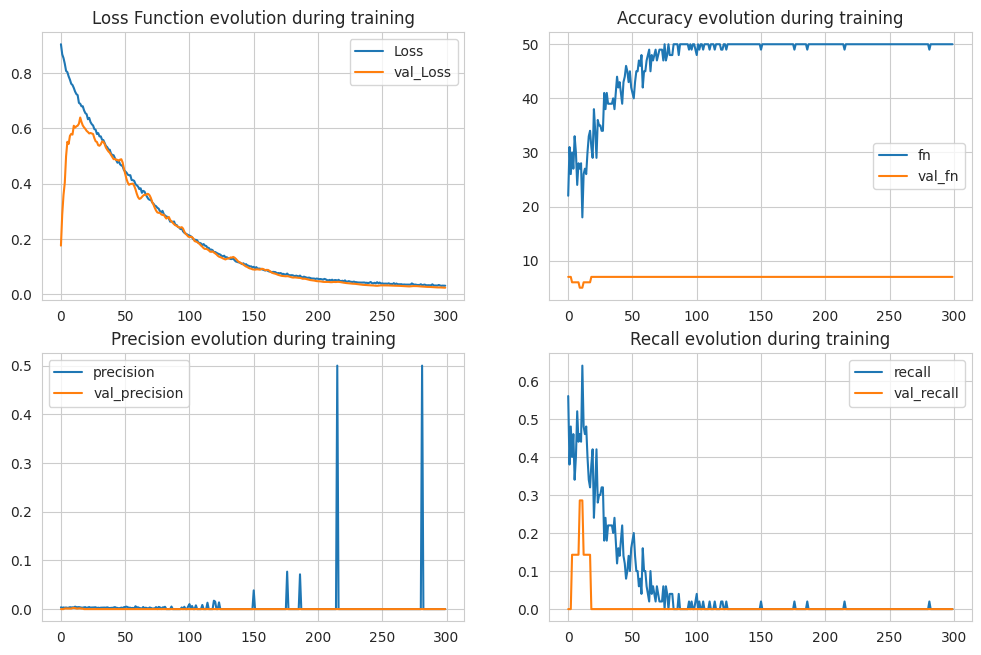

In [154]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['fn'], label='fn')
plt.plot(history.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()